# Assignment 4 Submission for Adarsh Pal (180032)

Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

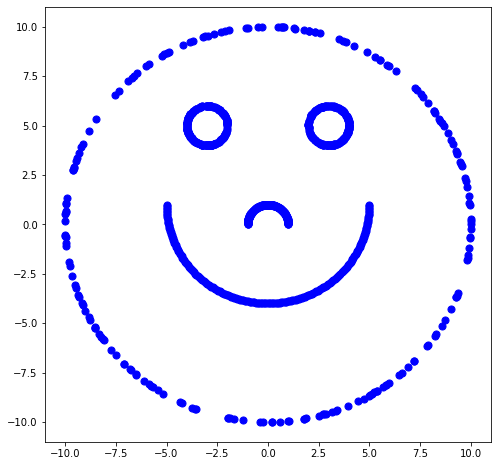

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

## Q1 (a) Implementation of K-Means Algorithm

In [4]:
def kmeans(X,k,mu):
    n=X.shape[0]
    y=np.zeros(n,dtype=int)
    muold=mu+1
    iter=0
    #Convergence Criterion: when the cluster means do not change by much
    while(np.sum(np.abs(mu-muold)**2)>1e-5):
        iter+=1
        for i in range(n):
            #Updating the cluster for each example
            y[i]=np.argmin(lin.norm(X[i]-mu,axis=1)**2)
        for j in range(k):
            muold[j]=mu[j]
            X_cluster=X[y==j]
            #Updating the cluster means for each cluster
            mu[j]=np.mean(X_cluster,axis=0)
    print("Total Iterations:",iter)
    return (y,mu)

Total Iterations: 21


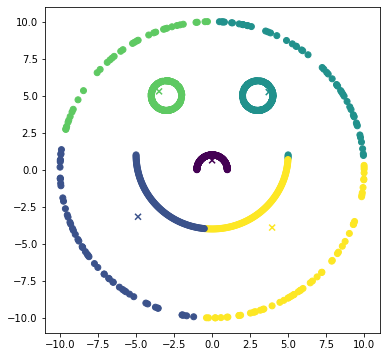

In [5]:
# k: the number of clusters
k=5

#Randomly initializing the cluster centres
mu=np.random.random((k,2))
(y,mu)=kmeans(X,k,mu)
#Plotting the points with cluster means
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(mu[:,0],mu[:,1],c=np.arange(0,k),marker='x')
plt.show()

## (b) Using K-Means++ Algorithm for Initializing Clusters

In [6]:
def kmeansplus(X,k):
    mu=np.zeros((k,2))
    n=X.shape[0]
    # Choosing a random point as the first cluster centre
    first=np.random.randint(n)
    mu[0,:]=X[first,:]
    #dist stores the Distance D(x) of each point from the nearest cluster centre
    dist=np.linalg.norm(mu[0,:]-X,axis=1)
    for i in range(1,k):
        #Randomly choosing the next cluster centre with probability of choosing a point x=D(x)^2
        sqdist=dist*dist        
        chosen=np.random.choice(np.arange(n),p=sqdist/np.sum(sqdist))
        mu[i,:]=X[chosen,:]
        #Updating the nearest cluster centre for each point 
        curdist=np.linalg.norm(mu[i,:]-X,axis=1)
        less=curdist<dist
        dist=curdist*less+dist*(1-less)
    return mu

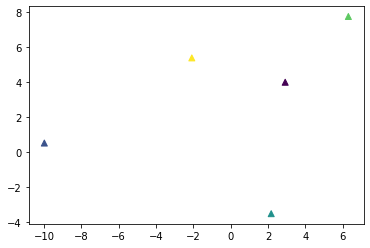

In [7]:
k=5
mu0=kmeansplus(X,k)
#Plotting the cluster centres initialized with K-Means++
plt.scatter(mu0[:,0],mu0[:,1],c=np.arange(0,k),marker='^')

Total Iterations: 18


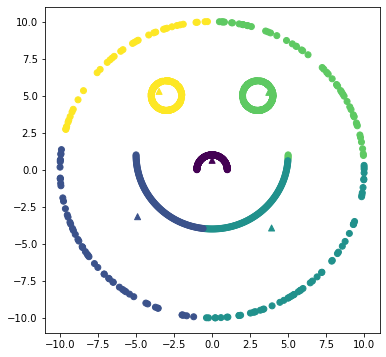

In [8]:
#Running K-Means using cluster centres initialized with K-Means++
(y,mu)=kmeans(X,k,mu0)
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(mu[:,0],mu[:,1],c=np.arange(0,k),marker='^')
plt.show()

# (c) Finding the value of k that gives the best clustering

In [9]:
#Writing the loss function for K-Means Clustering
def findloss(X,y,k):
    one_hot=np.zeros((X.shape[0], k))
    rows=np.arange(X.shape[0])
    one_hot[rows,y]=1
    loss=X-np.matmul(one_hot,mu)
    lsq=lin.norm(loss,2,axis=1)
    lsq=lsq*lsq
    finalloss=np.sum(lsq)
    return finalloss

In [10]:
#Finding the losses for k=1,2,...,20
tot=20
errors=np.zeros(tot)
for k in range(1,tot):
    mu=kmeansplus(X,k)
    (y,mu)=kmeans(X,k,mu)
    errors[k]=findloss(X,y,k)
    print("Loss for k=",k,"is",errors[k])

Total Iterations: 2
Loss for k= 1 is 35448.26500123375
Total Iterations: 7
Loss for k= 2 is 22542.808756192215
Total Iterations: 15
Loss for k= 3 is 15668.511500310584
Total Iterations: 8
Loss for k= 4 is 11121.613059806059
Total Iterations: 14
Loss for k= 5 is 8041.669395654692
Total Iterations: 10
Loss for k= 6 is 6795.381951493238
Total Iterations: 14
Loss for k= 7 is 5963.619945104791
Total Iterations: 14
Loss for k= 8 is 5504.437446401877
Total Iterations: 13
Loss for k= 9 is 4476.8244943732325
Total Iterations: 17
Loss for k= 10 is 3472.737094997593
Total Iterations: 28
Loss for k= 11 is 3203.4169434783503
Total Iterations: 14
Loss for k= 12 is 2828.0842293556225
Total Iterations: 29
Loss for k= 13 is 2156.384508670938
Total Iterations: 26
Loss for k= 14 is 2069.9618716122063
Total Iterations: 11
Loss for k= 15 is 1817.4826864176057
Total Iterations: 14
Loss for k= 16 is 1605.4406126161255
Total Iterations: 14
Loss for k= 17 is 1457.1549450314778
Total Iterations: 15
Loss for k= 

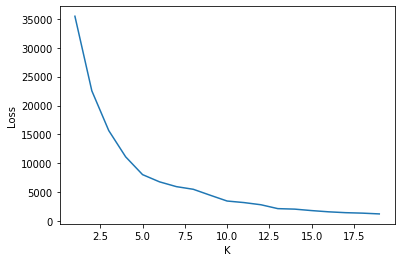

In [11]:
#Plotting the losses for k=1,2,..,20
plt.xlabel('K')
plt.ylabel('Loss')
plt.plot(np.arange(1,tot),errors[1:])

From the above graph, it looks like k=5 would be an optimal cluster size.

Total Iterations: 32


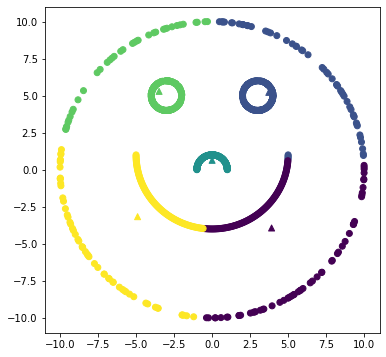

In [12]:
#K-Means Algorithm with k=5
k=5
mu0=kmeansplus(X,k)
(y,mu)=kmeans(X,k,mu0)
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(mu[:,0],mu[:,1],c=np.arange(0,k),marker='^')
plt.show()

# (d) Kernelizing K-Means algorithm with a Gaussian kernel

Suppose $\mathcal{S}_{j}$ is the set containing the points in the $j^{th}$ cluster.<br>
The $j^{th}$ cluster centre is
$$
\mu_j=\frac{1}{\left|\mathcal{S}_{j}\right|} \sum_{i \in \mathcal{S}_{j}} \Phi\left(x_{i}\right)
$$
In each iteration, the cluster $j$ to which a point ${x}_{i}$ belongs is found as follows,
$$\underset{j}{\arg \min } \Phi\left({x}_{i}\right)^T \Phi\left({x}_{i}\right)-\frac{2 \sum_{k \in \mathcal{S}_{j}} \Phi\left({x}_{i}\right)^T \Phi\left({x}_{k}\right)}{\left|\mathcal{S}_{j}\right|}+\frac{\sum_{l, k \in \mathcal{S}_{j}} \Phi\left({x}_{l}\right)^T \Phi\left({x}_{k}\right)}{\left(\left|\mathcal{S}_{j}\right|\right)^{2}}$$<br>
$$=\underset{j}{\arg \min } K\left({x}_{i},{x}_{i}\right)-\frac{2 \sum_{k \in \mathcal{S}_{j}} K\left({x}_{i},{x}_{k}\right)}{\left|\mathcal{S}_{j}\right|}+\frac{\sum_{l, k \in \mathcal{S}_{j}} K\left({x}_{l},{x}_{k}\right)}{\left(\left|\mathcal{S}_{j}\right|\right)^{2}}$$<br>

Note: We are not explicitly calculating the cluster centres

In [13]:
#Gaussian Kernel Function
def kern(x,y):
    return np.exp(-lin.norm(x-y,axis=1)**2/2)

In [14]:
#Implementing Kernelized K-Means
def kernkmeans(X,k):
    n=X.shape[0]
    #Randomly assigning cluster to each example
    y=np.random.randint(0,k,n,dtype=int)
    yold=np.zeros(n,dtype=int)
    iter=0
    #Stopping Criterion: when the cluster of no example changes
    while(np.sum(y!=yold)!=0):
        iter+=1
        print(iter,end=" ")
        #Updating the cluster for each example
        for i in range(n):
            yold[i]=y[i]
            dist=np.zeros(k)
            for j in range(k):
                X_cluster=X[y==j]
                nk=X_cluster.shape[0]
                sum=0
                for z in range(nk):
                    sum+=np.sum(kern(X_cluster[z],X_cluster))
                #Finding the cluster distance of a point from each cluster mean implicitly
                dist[j]=1-(2/nk)*np.sum(kern(X[i],X_cluster))+(1/nk**2)*sum
            y[i]=np.argmin(dist)
    print("\nTotal iterations taken:",iter)
    return y

1 2 3 
Total iterations taken: 3


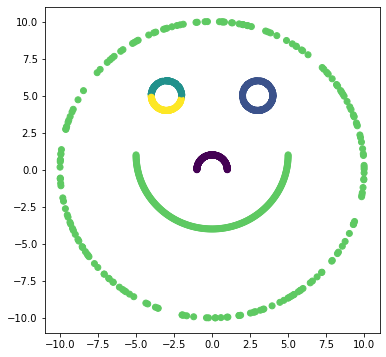

In [15]:
#Running Kernelized K-Means Algorithm
k=5
y=kernkmeans(X,k)
plt.figure(figsize=(6, 6))
plt.scatter(X[:,0],X[:,1],c=y)

Clearly, the Kernelized K-Means did better at clustering than normal K-Means.

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

# Q2 (a) Deriving the E-step and M-step

Firstly, we note that $\Theta=\{\mu_k,\sigma^2_k\}_{k=1}^K$
\begin{align*}
p(z_n=k|x_n,\hat{\Theta}) &\propto p(z_n=k|\widehat{\Theta})p(x_n|z_n=k,\widehat{\Theta})\\
&= p(z_n=k|\widehat{\Theta})p(x_n|z_n=k,\widehat{\Theta})\\
&= \pi_k~N(\widehat{\mu_k}, \widehat{\sigma^2_k} I)
\end{align*}

\begin{align*}
\widehat{\Theta}
&=\operatorname{argmax}_{\Theta} \mathbb{E}_{p\left(Z|X,\hat{\Theta}\right)}\left[\log{p\left(X,Z|\Theta\right)}\right]\\
&=\sum_{n=1}^{N} \mathbb{E}_{p\left(z_n \mid x_n, \widehat{\Theta}\right)}\left[\log p\left(x_n,z_n \mid \Theta\right)\right]\\
&=\operatorname{argmax}_{\Theta} \mathbb{E}\left[\sum_{n=1}^{N} \sum_{k=1}^{K} z_{n k}\left[\log \pi_{k}+\log N\left(x_n \mid \mu_{k}, \sigma^2_k I\right)\right]\right]\\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \mathbb{E}\left[z_{n k}\right]\left[\log \pi_{k}+\log N\left(x_n \mid \mu_{k}, \sigma^2_k I\right)\right]
\end{align*}

Now,
\begin{align*}
\mathbb{E}\left[z_{n k}\right]
&=\gamma_{n k}\\
&=0 \times p\left(z_{n k}=0 \mid x_{n}, \widehat{\Theta}\right)+1 \times p\left(z_{n k}=1 \mid x_{n}, \widehat{\Theta}\right)\\
&=p\left(z_{n k}=1 \mid x_{n}, \widehat{\Theta}\right)\\
&=\frac{\pi_k N\left(x_{n} \mid \hat{\mu}_{k}, \widehat{\sigma^2_k}I\right)}{\sum_{l=1}^{K}\pi_{l} N\left(x_{n} \mid \hat{\mu}_{l}, \widehat{\sigma^2_l}I\right)}
\end{align*}

# E Step

\begin{align*}
\mathbb{E}\left[z_{n k}\right]=\gamma_{nk}
&=\frac{\pi_k N\left(x_{n} \mid \hat{\mu}_{k}, \widehat{\sigma^2_k}I\right)}{\sum_{l=1}^{K}\pi_{l} N\left(x_{n} \mid \hat{\mu}_{l}, \widehat{\sigma^2_l}I\right)}\\
\\
N_k&=\sum_{n=1}^{N}\gamma_{nk}
\end{align*}

# M Step

\begin{align*}
\widehat{\Theta}
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \mathbb{E}\left[z_{n k}\right]\left[\log \pi_{k}+\log N\left(x_n \mid \mu_{k}, \sigma^2_k I\right)\right]\\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{nk}\left[\log \pi_{k}+\log N\left(x_n \mid \mu_{k}, \sigma^2_k I\right)\right]\\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{nk}\left[\log \pi_{k}+\log \left[\frac{1}{(2\pi)^{\frac{D}{2}}(\sigma_k^2)^{\frac{D}{2}}} exp\left( -\frac{1}{2}(x_n-\mu_k)^T\frac{I}{\sigma_k^2}(x_n-\mu_k)\right]\right)\right]\\
&=\operatorname{argmax}_{\Theta} \sum_{n=1}^{N} \sum_{k=1}^{K} \gamma_{nk}\left[\log \pi_{k}-\frac{D}{2}\log{(2\pi)}-\frac{D}{2}\log{(\sigma_k^2)}-\left(\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right)\right]\\
\end{align*}

### Finding the optimal values of $\mu_k$ and $\sigma_k^2$:

### For $\mu_k$:

\begin{align*}
\frac{\partial \widehat{\Theta}}{\partial \mu_k}&=0\\
\Rightarrow \sum_{n=1}^{N} -\gamma_{nk}\frac{\partial}{\partial \mu_k} \left(\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} -\gamma_{nk}\left(\frac{1}{\sigma_k^2}(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} -\gamma_{nk}\left(x_n-\mu_k\right)&=0\\
\Rightarrow \sum_{n=1}^{N} \gamma_{nk}\mu_k&=\sum_{n=1}^{N} \gamma_{nk}x_n\\
\Rightarrow \mu_k\sum_{n=1}^{N} \gamma_{nk}&=\sum_{n=1}^{N} \gamma_{nk}x_n\\
\Rightarrow \mu_k N_k&=\sum_{n=1}^{N} \gamma_{nk}x_n\\
\Rightarrow \mu_k &=\frac{1}{N_k}\sum_{n=1}^{N} \gamma_{nk}x_n\\
\end{align*}

\begin{align*}
\frac{\partial \widehat{\Theta}}{\partial \sigma_k^2}&=0\\
\Rightarrow \sum_{n=1}^{N} -\gamma_{nk}\frac{\partial}{\partial \sigma_k^2} \left(\frac{D}{2}\log{(2\pi)}+\frac{D}{2}\log{(\sigma_k^2)}+\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} \gamma_{nk}\frac{\partial}{\partial \sigma_k^2} \left(\frac{D}{2}\log{(2\pi)}+\frac{D}{2}\log{(\sigma_k^2)}+\frac{1}{2\sigma_k^2}(x_n-\mu_k)^T(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} \gamma_{nk}\left(\frac{D}{2\sigma_k^2}-\frac{1}{2(\sigma_k^2)^2}(x_n-\mu_k)^T(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} \gamma_{nk}\left(D\sigma_k^2-(x_n-\mu_k)^T(x_n-\mu_k)\right)&=0\\
\Rightarrow \sum_{n=1}^{N} \gamma_{nk}D\sigma_k^2 &= \sum_{n=1}^{N} \gamma_{nk}(x_n-\mu_k)^T(x_n-\mu_k)\\
\Rightarrow D\sigma_k^2\sum_{n=1}^{N} \gamma_{nk} &= \sum_{n=1}^{N} \gamma_{nk}(x_n-\mu_k)^T(x_n-\mu_k)\\
\Rightarrow D\sigma_k^2 N_k &= \sum_{n=1}^{N} \gamma_{nk}(x_n-\mu_k)^T(x_n-\mu_k)\\
\Rightarrow \sigma_k^2 &= \frac{1}{D~N_k}\sum_{n=1}^{N} \gamma_{nk}(x_n-\mu_k)^T(x_n-\mu_k)\\
\end{align*}

### For $\sigma_k^2$:

# The entire EM Algorithm will be as follows:

## (1) Initialization:

Set $\Theta=\{\mu_k,\sigma^2_k\}_{k=1}^K$ as $\Theta^{(0)},~t=0 $

## (2) E-Step: Computing the Expectation of each $z_n$

\begin{align*}
\mathbb{E}\left[z_{n k}^{(t)}\right]=\gamma_{nk}^{(t)}
&=\frac{\pi_k N\left(x_{n} \mid \mu_{k}^{(t-1)}, (\sigma^2_k)^{(t-1)} I\right)}{\sum_{l=1}^{K}\pi_{l} N\left(x_{n} \mid \mu_{l}^{(t-1)}, (\sigma^2_l)^{(t-1)}I\right)}\\
\\
N_k^{(t)}&=\sum_{n=1}^{N}\gamma_{nk}^{(t)}
\end{align*}

## (3) M-Step: Re Estimating $\Theta$ using MLE:

\begin{align*}
\mu_k^{(t)} &=\frac{1}{N_k^{(t)}}\sum_{n=1}^{N} \gamma_{nk}^{(t)}x_n\\
(\sigma_k^2)^{(t)} &= \frac{1}{D~N_k^{(t)}}\sum_{n=1}^{N} \gamma_{nk}^{(t)}(x_n-\mu_k^{(t)})^T(x_n-\mu_k^{(t)})\\
\end{align*}

## (4) Updating t=t+1 and go to step 2 if not converged

# Q2 (b) Implementing the algorithm

In [16]:
#Using this library to generate artificial data
from scipy.stats import multivariate_normal

In [17]:
#Generating artificial data
def genart(pik,mu,sig,n):
    ngen=n
    y=np.zeros(ngen,dtype=int)
    xgen=np.zeros((ngen,d))
    for j in range(ngen):
        c=np.random.choice(np.arange(k),p=pik)
        y[j]=c
        xgen[j,:]=multivariate_normal(mean=mu[c], cov=sig[c]*I).rvs()
    return (xgen,y)

In [18]:
k=3
n=100
d=2
#Initializing mu, sigma^2 and pi for generation of data
mugen=np.zeros((k,2))
mugen[0,:]=[1,1]
mugen[1,:]=[10,10]
mugen[2,:]=[30,30]
siggen=np.array([4,9,16])
pigen=np.array([1./3, 1./3, 1./3])
I=np.eye(d)

In [19]:
(X,y)=genart(pigen,mugen,siggen,n)

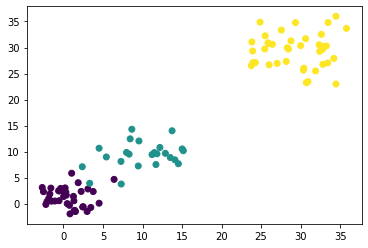

In [20]:
#Plot of Generated Data
plt.scatter(X[:,0],X[:,1],c=y)

In [21]:
#Implementing EM Algorithm
def em(X,pi,mean,sigma,gamma):
    for _ in range(100):
        print(_,end=" ")
        #Updating gamma
        for i in range(n):
            sum=0.
            for j in range(k):
                gamma[i][j]=pi[j]*multivariate_normal(mean=mean[j], cov=sigma[j]*I).pdf(X[i,:])
                sum+=gamma[i][j]
            gamma[i,:]/=sum
            
        nk=np.sum(gamma,axis=0)
        #Updating mu
        for j in range(k):
            mean[j,:]=(1./nk[j])*np.dot(gamma[:,j],X)
        #Updating sigma^2
        for j in range(k):
            sigma[j]=0
            for i in range(n):
                sigma[j]+=gamma[i,j]*np.dot(X[i,:]-mean[j,:],X[i,:]-mean[j,:])
            sigma[j]/=(d*nk[j])
    return(mean,sigma)

In [22]:
#Randomly initializing mu, sigma^2, and gamma.
pik=pigen
mu=10*np.random.random((k,2))
sig=10*np.random.random(k)
gam=np.random.random((n,k))

In [23]:
#muf: Stores the mu returned by EM Algorithm
#sigf: Stores the sigma^2 returned by EM Algorithm
(muf,sigf)=em(X,pik,mu,sig,gam)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [24]:
#xgen,ygen are values generated by taking mu and sigma^2 returned by EM Algorithm
(xgen,ygen)=genart(pik,muf,sigf,100)

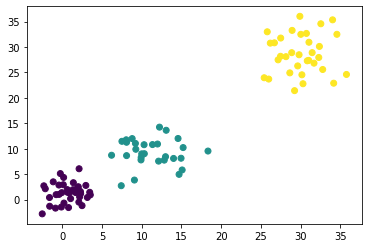

In [25]:
plt.scatter(xgen[:,0],xgen[:,1],c=ygen)

In [26]:
muf

array([[ 0.61093227,  1.24746082],
       [10.23850716,  9.39950227],
       [29.42384041, 29.42808815]])

In [27]:
mugen

array([[ 1.,  1.],
       [10., 10.],
       [30., 30.]])

In [28]:
sigf

array([ 3.58511943,  8.61335985, 11.64096554])

In [29]:
siggen

array([ 4,  9, 16])

Thus, we see that the EM Algorithm has returned values for mu and sigma^2 very close to the actual ones.